In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import axes3d
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_recall_fscore_support as prf
from sklearn.metrics import plot_confusion_matrix

In [361]:
data = pd.read_csv("banknote_authentication.csv")
data.head()

,wavelet_variance,wavelet_skewness,wavelet_curtosis,image_entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [362]:
target = data.pop("class")
target.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [363]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, stratify=target)

In [364]:
print(f"""There are a total of {data.shape[0]} samples each with {data.shape[1]} features.
Training set contains {len(X_train)} samples while test set contains {len(y_test)} samples.
There are a total of {len(np.unique(y))} different classes.""")

There are a total of 1372 samples each with 4 features.
Training set contains 1097 samples while test set contains 275 samples.
There are a total of 2 different classes.


In [365]:
data.describe()

,wavelet_variance,wavelet_skewness,wavelet_curtosis,image_entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [366]:
target.describe()

count    1372.000000
mean        0.444606
std         0.497103
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: class, dtype: float64

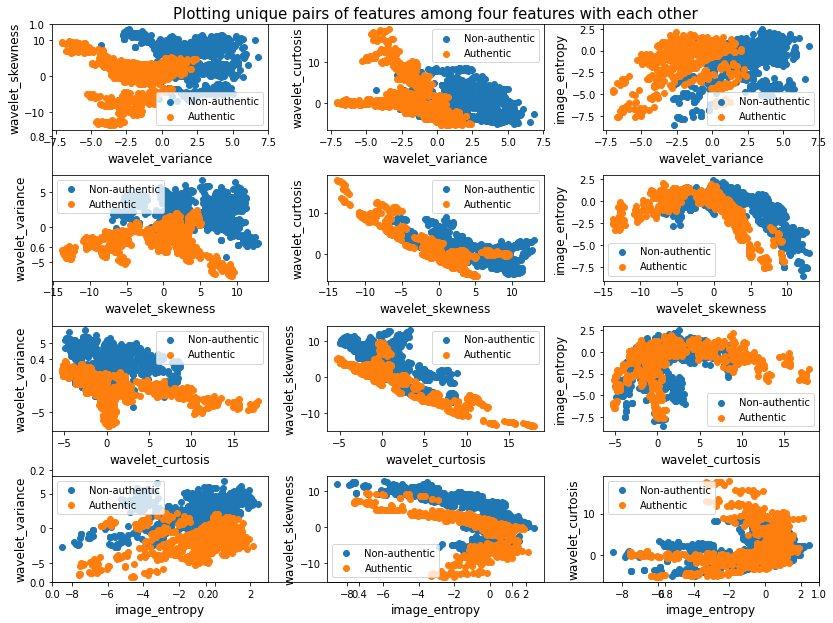

In [367]:
header = data.columns # Feature names
fig_idx = 1 # Index of current figure subplot
figure = plt.figure(figsize=(12, 9))
plt.title("Plotting unique pairs of features among four features with each other", fontsize=15)
for i in range(4):
    for j in range(4):
        if header[i] == header[j]: # Do not plot same features against each other
            continue
        axes = figure.add_subplot(4, 3, fig_idx)
        axes.scatter(data.loc[y==0, header[i]], data.loc[y==0, header[j]], label="Non-authentic")
        axes.scatter(data.loc[y==1, header[i]], data.loc[y==1, header[j]], label="Authentic")
        axes.set_xlabel(header[i], fontsize=12)
        axes.set_ylabel(header[j], fontsize=12)
        axes.legend()
        fig_idx += 1
plt.tight_layout()

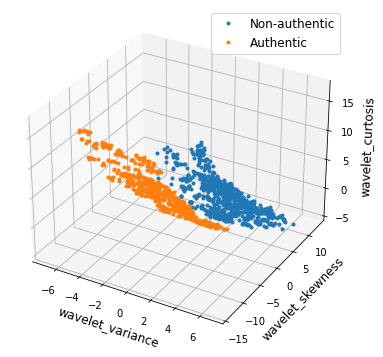

In [368]:
figure = plt.figure(figsize=(7, 5))
axes = plt.axes(projection="3d")
plt.plot(data.loc[y==0, header[0]], data.loc[y==0, header[1]], data.loc[y==0, header[2]], marker=".", linestyle="None", label="Non-authentic")
plt.plot(data.loc[y==1, header[0]], data.loc[y==1, header[1]], data.loc[y==1, header[2]], marker=".", linestyle="None", label="Authentic")
plt.legend(fontsize=12)
axes.set_xlabel(header[0], fontsize=12)
axes.set_ylabel(header[1], fontsize=12)
axes.set_zlabel(header[2], fontsize=12)
plt.tight_layout()

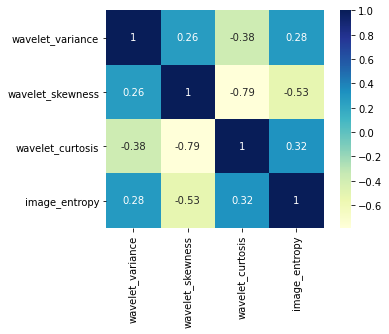

In [369]:
plt.figure(figsize=(6, 4))
corr_matrix = data.corr() # Correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", square=True)
plt.show()

In [370]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

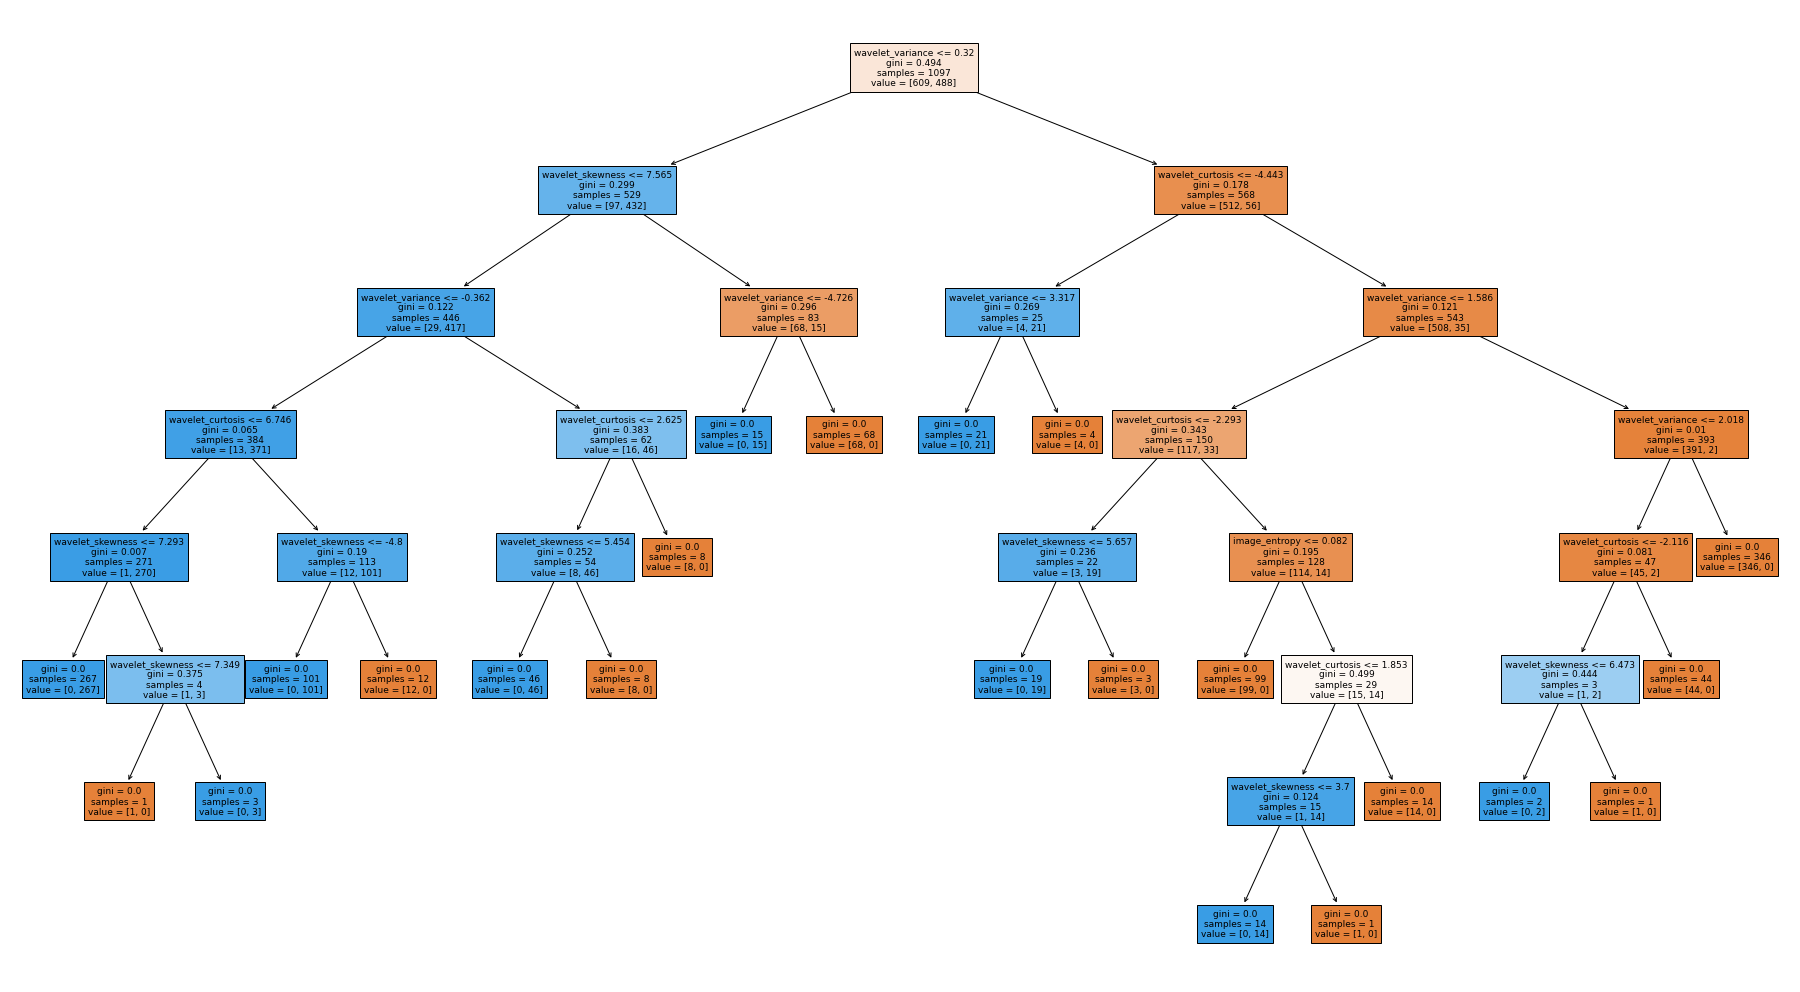

In [371]:
plt.figure(figsize=(32, 18))
plot_tree(dtree, feature_names=header, filled=True, fontsize=9)
plt.show()

In [372]:
training_acc = dtree.score(X_train, y_train)
test_acc = dtree.score(X_test, y_test)
precision, recall, fscore, _ = prf(y_test, dtree.predict(X_test), average="binary")
print(f"""Training accuracy: {training_acc}
Testing accuracy: {test_acc}
Precision: {precision}
Recall: {recall}
FScore: {fscore}""")

Training accuracy: 1.0
Testing accuracy: 0.9818181818181818
Precision: 0.9834710743801653
Recall: 0.9754098360655737
FScore: 0.9794238683127573


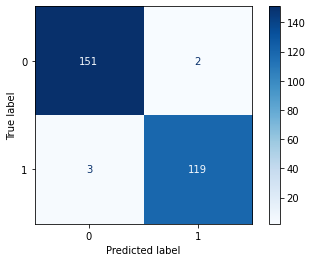

In [373]:
plot_confusion_matrix(dtree, X_test, y_test, cmap=plt.cm.Blues, display_labels=[0, 1])